In [1]:
import torch
import torchaudio
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

In [20]:

path = os.path.join("..", "..", "data", "MagnaTagATune", "samples", "train", "0", "american_bach_soloists-j_s__bach__cantatas_volume_v-01-gleichwie_der_regen_und_schnee_vom_himmel_fallt_bwv_18_i_sinfonia-117-146.npy")

In [21]:
data = np.load(path)
waveform = torch.tensor(data, dtype=torch.float32)
print(waveform.shape)
spectrogram = torchaudio.transforms.MelSpectrogram(n_mels=64)(waveform)
print(spectrogram.shape)
print(spectrogram)

torch.Size([349500])
torch.Size([64, 1748])
tensor([[1.1488e-01, 5.9581e+02, 4.3893e+03,  ..., 3.9072e+05, 2.1790e+01,
         0.0000e+00],
        [1.1555e-01, 7.1141e+02, 8.6404e+03,  ..., 2.9662e+05, 3.7919e+01,
         0.0000e+00],
        [1.0922e-01, 9.8326e+02, 1.9880e+04,  ..., 1.3203e+04, 8.0200e+01,
         0.0000e+00],
        ...,
        [1.6323e-02, 7.7496e+01, 1.1607e+02,  ..., 2.2161e+04, 1.8314e+01,
         0.0000e+00],
        [8.6226e-03, 8.7018e+01, 5.8451e+02,  ..., 3.2083e+04, 1.5373e+01,
         0.0000e+00],
        [7.7783e-03, 9.4213e+01, 6.0132e+02,  ..., 1.2024e+04, 2.7380e+01,
         0.0000e+00]])


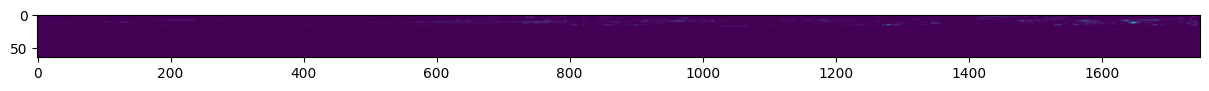

In [22]:
# Plot and save the mel spectrogram
plt.figure(figsize=(15, 35))
plt.imshow(spectrogram)

# Save the spectrogram to an image file
# plt.savefig('mel_spectrogram.png')

# Display the plot
plt.show()